# Regresion Lineal: Costo de un incidente de seguridad

En este ejercicio se explican los fundamentos de la regresion lineal aplicada a caso sencillo reacionado con la CyberSeguridad.

#### Enunciado del Ejercicio

EL ejercicio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos afetados. El conjunto de datos es generado de manera aleatoria.

## 1.- Generacion del DataSet

In [16]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


## 2.- Visualizacion del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

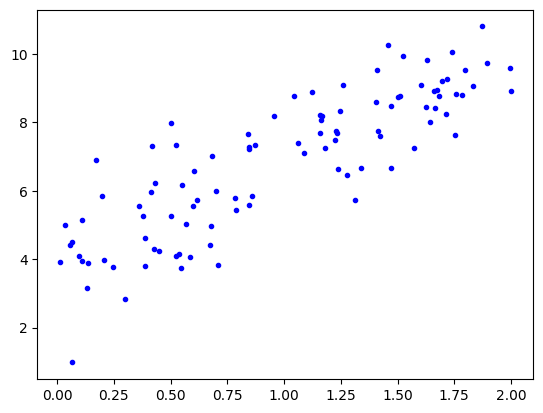

In [3]:
plt.plot(X,y,"b.")
plt.show()

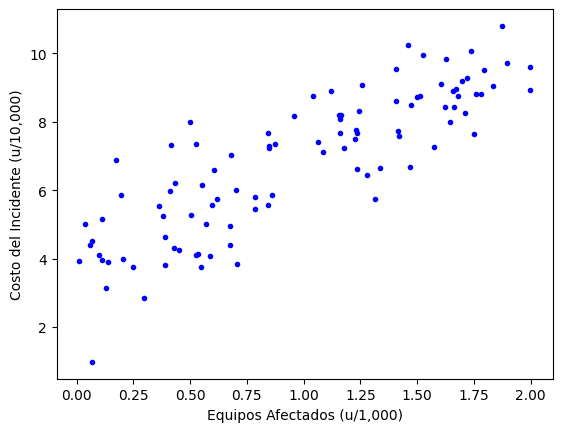

In [4]:
plt.plot(X,y,"b.")
plt.xlabel("Equipos Afectados (u/1,000)")
plt.ylabel("Costo del Incidente (u/10,000)")
plt.show()

## 3.- Modificacion del DataSet

In [5]:
import pandas as pd
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.057923,4.406402
1,1.624849,8.433464
2,0.034416,4.997668
3,1.244358,8.314867
4,0.380018,5.256199
5,0.547787,3.756221
6,1.160045,7.680898
7,1.752107,7.625412
8,0.387546,4.625758
9,0.586736,4.066903


In [6]:
# Escalando el Numero de Equipos Afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype(int)
# Escalado del costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype(int)
df.head(10)

,No_Equipos_Afectados,Costo
0,57,44064
1,1624,84334
2,34,49976
3,1244,83148
4,380,52561
5,547,37562
6,1160,76808
7,1752,76254
8,387,46257
9,586,40669


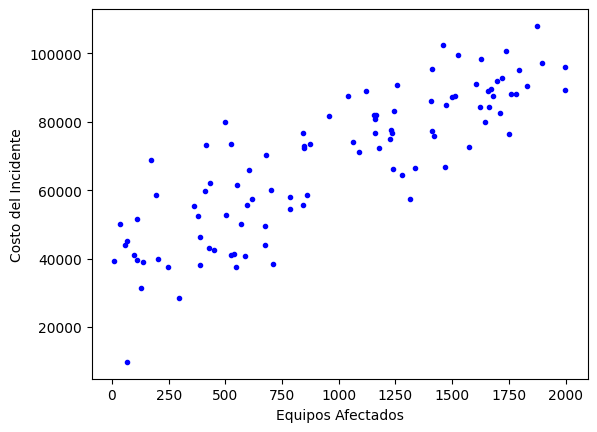

In [7]:
# Representacion grafica del DataSet
plt.plot(df['No_Equipos_Afectados'], df['Costo'],"b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

## 4.- Construcion del Modelo

In [8]:
from sklearn.linear_model import  LinearRegression

In [9]:
# Construccion del Modelo y ajuste de la funcion de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1,1), df['Costo'].values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Parametro Theta 0 (en donde se intercepta la pendiente)
lin_reg.intercept_

np.float64(38780.444187695444)

In [11]:
# Parametro Theta 1 (coeficiente de correlacio)
lin_reg.coef_

array([30.202768])

In [12]:
# Prediccion para el valor minimo y maximo del DataSet de entrenamento
x_min_max = np.array([[df['No_Equipos_Afectados'].min()],[df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(x_min_max)

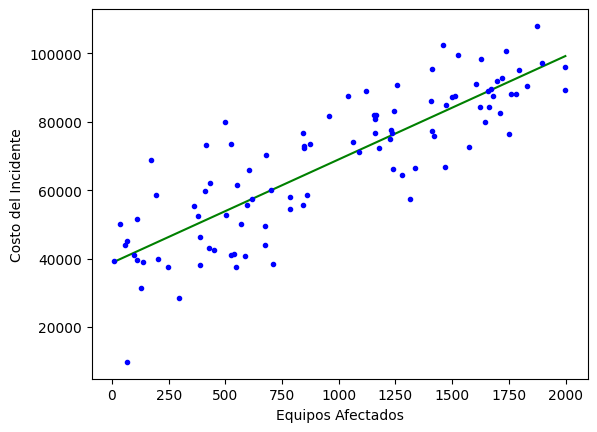

In [13]:
# Representacio grafica de la hipotesis generada
plt.plot(x_min_max,y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

## 5.- Prediccion de nuevos ejemplos

In [14]:
x_new=np.array([[1500]]) #1500 equipos afectados

#Prediccion del Costo que tendria el incidente 
Costo = lin_reg.predict(x_new)

print ("El costo del incidente seria: $", int(Costo[0]))

El costo del incidente seria: $ 84084


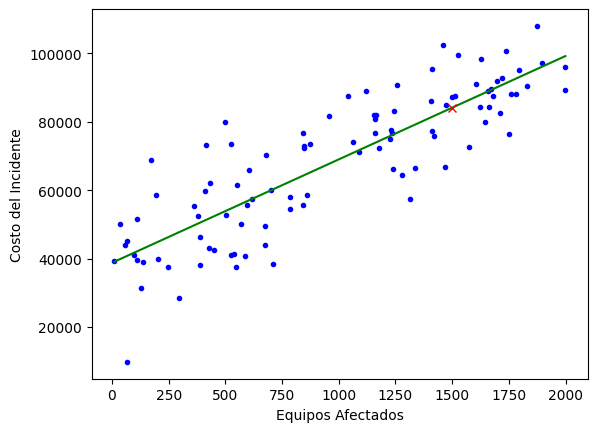

In [15]:

plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(x_min_max,y_train_pred, "g-")
plt.plot(x_new, Costo,"rx")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()